# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [47]:
#create url for query 
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)



#lists to hold response info
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudy = []
wspeed = []
country = []
date = []
city_count = 0 
city_set = 1 

#Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:  
        response = requests.get(query_url + city).json()  
        city_name.append(response["name"])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_count +=1
    
        print(f"Processing Record {city_count} of Set {city_set} | {city}")
    except:
        print('City not found. Skipping')
    




http://api.openweathermap.org/data/2.5/weather?appid=f6fdde5cb8d527a63ed5c816d534b1f6&units=imperial&q=
Processing Record 1 of Set 1 | yerbogachen
Processing Record 2 of Set 1 | kavaratti
Processing Record 3 of Set 1 | wanning
City not found. Skipping
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | sao joao da barra
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | yellowknife
City not found. Skipping
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | acapulco
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | mareeba
City not found. Skipping
City not found. Skipping
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | busselton
Processing Record 2

Processing Record 179 of Set 1 | jiuquan
Processing Record 180 of Set 1 | gebre guracha
Processing Record 181 of Set 1 | garowe
Processing Record 182 of Set 1 | van
Processing Record 183 of Set 1 | mosquera
Processing Record 184 of Set 1 | horta
Processing Record 185 of Set 1 | esperance
Processing Record 186 of Set 1 | dawei
Processing Record 187 of Set 1 | santo tomas
Processing Record 188 of Set 1 | port hardy
Processing Record 189 of Set 1 | lazaro cardenas
Processing Record 190 of Set 1 | chimbote
Processing Record 191 of Set 1 | yatou
Processing Record 192 of Set 1 | gazli
Processing Record 193 of Set 1 | saint anthony
Processing Record 194 of Set 1 | bodden town
City not found. Skipping
Processing Record 195 of Set 1 | tadine
Processing Record 196 of Set 1 | lorengau
Processing Record 197 of Set 1 | korla
Processing Record 198 of Set 1 | talnakh
City not found. Skipping
Processing Record 199 of Set 1 | sarankhola
Processing Record 200 of Set 1 | grindavik
City not found. Skippin

Processing Record 366 of Set 1 | garwolin
Processing Record 367 of Set 1 | methoni
Processing Record 368 of Set 1 | kaoma
Processing Record 369 of Set 1 | kathu
Processing Record 370 of Set 1 | kavieng
Processing Record 371 of Set 1 | torquay
City not found. Skipping
Processing Record 372 of Set 1 | zonguldak
Processing Record 373 of Set 1 | zhaozhou
Processing Record 374 of Set 1 | maceio
Processing Record 375 of Set 1 | cafarnaum
Processing Record 376 of Set 1 | roma
Processing Record 377 of Set 1 | new ipswich
Processing Record 378 of Set 1 | soledad
Processing Record 379 of Set 1 | betanzos
Processing Record 380 of Set 1 | sept-iles
Processing Record 381 of Set 1 | yarmouth
Processing Record 382 of Set 1 | wagar
Processing Record 383 of Set 1 | faya
Processing Record 384 of Set 1 | port lincoln
Processing Record 385 of Set 1 | mahibadhoo
Processing Record 386 of Set 1 | nara
Processing Record 387 of Set 1 | vanavara
Processing Record 388 of Set 1 | plettenberg bay
City not found. S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
# create a dataframe from cities, and corresponding data from api
weather_data = ({
    "Cities": city_name,
    "Latitude": lat,
    "Longitude": lon,
    "Max_temp": max_temp,
    "Humidity": humidity, 
    "Cloudy": cloudy,
    "Date": date,
    "Country": country,
    "Wind" : wspeed
})
weather_data = pd.DataFrame(weather_data)
weather_data



,Cities,Latitude,Longitude,Max_temp,Humidity,Cloudy,Date,Country,Wind
0,Yerbogachën,61.2767,108.0108,40.75,90,100,1630873609,RU,6.02
1,Kavaratti,10.5669,72.6420,81.43,78,100,1630873610,IN,16.42
2,Wanning,18.8003,110.3967,79.81,86,61,1630873610,CN,0.36
3,Hobart,-42.8794,147.3294,46.26,65,20,1630873611,AU,1.99
4,São João da Barra,-21.6403,-41.0511,75.29,83,77,1630873611,BR,11.99
...,...,...,...,...,...,...,...,...,...
528,Nikki,9.9401,3.2108,73.62,90,100,1630873837,BJ,1.52
529,Haines Junction,60.7522,-137.5108,58.95,63,100,1630873838,CA,1.14
530,Halifax,44.6453,-63.5724,65.52,72,96,1630873747,CA,8.05
531,Maţāy,28.4190,30.7792,79.70,47,0,1630873838,EG,16.02


In [50]:
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

weather_data.to_csv(r'\outweatherdata.csv', index = False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
weather_data.describe()


,Latitude,Longitude,Max_temp,Humidity,Cloudy,Date,Wind
count,533.000000,533.000000,533.000000,533.000000,533.000000,5.330000e+02,533.000000
mean,19.267910,20.855595,66.595084,70.960600,53.356473,1.630874e+09,7.575966
std,33.833498,90.373248,15.806466,20.355588,39.468181,8.861025e+01,5.285115
min,-54.800000,-175.200000,11.710000,4.000000,0.000000,1.630873e+09,0.000000
25%,-8.466700,-59.950000,54.010000,62.000000,11.000000,1.630874e+09,3.530000
50%,22.877900,23.466700,70.200000,76.000000,60.000000,1.630874e+09,6.170000
75%,47.130100,103.206400,78.390000,86.000000,95.000000,1.630874e+09,10.360000
max,78.218600,178.416700,104.340000,100.000000,100.000000,1.630874e+09,28.880000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

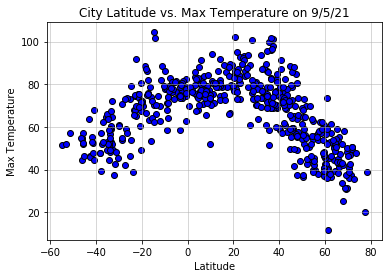

In [56]:
#plotting latitude versus temperature 
plt.scatter(weather_data["Latitude"], weather_data["Max_temp"], facecolors="blue", edgecolor="black")

#Title
plt.title("City Latitude vs. Max Temperature on 9/5/21")

# x axis label
plt.xlabel("Latitude")

# y axis label
plt.ylabel("Max Temperature")

# grid lines
plt.grid(linestyle='-', linewidth=.5)

plt.savefig("lattemp.png")
  
plt.show()

## Latitude vs. Humidity Plot

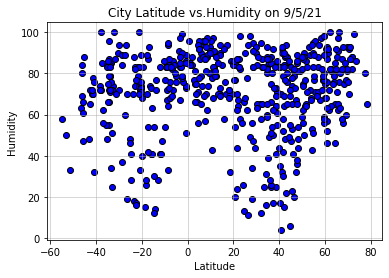

In [57]:
#plotting latitude versus temperature 
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="blue", edgecolor="black")

#Title
plt.title("City Latitude vs.Humidity on 9/5/21")

# x axis label
plt.xlabel("Latitude")

# y axis label
plt.ylabel("Humidity")

# grid lines
plt.grid(linestyle='-', linewidth=.5)

plt.savefig("lathumid.png")
  
plt.show()

## Latitude vs. Cloudiness Plot

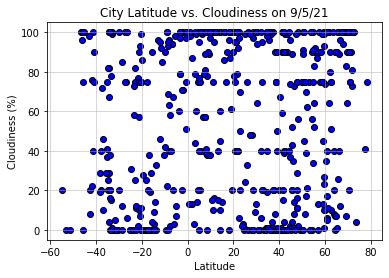

In [96]:
#plotting latitude versus temperature 
plt.scatter(weather_data["Latitude"], weather_data["Cloudy"], facecolors="blue", edgecolor="black")

#Title
plt.title("City Latitude vs. Cloudiness on 9/5/21")

# x axis label
plt.xlabel("Latitude")

# y axis label
plt.ylabel("Cloudiness (%)")

# grid lines
plt.grid(linestyle='-', linewidth=.5)

plt.savefig("latcloudy.png")
  
plt.show()

## Latitude vs. Wind Speed Plot

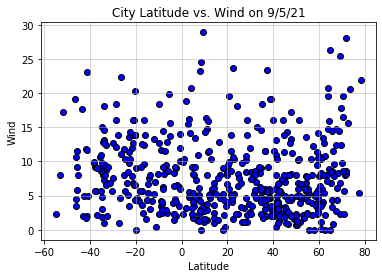

In [150]:
#plotting latitude versus temperature 
plt.scatter(weather_data["Latitude"], weather_data["Wind"], facecolors="blue", edgecolor="black")

#Title
plt.title("City Latitude vs. Wind on 9/5/21")

# x axis label
plt.xlabel("Latitude")

# y axis label
plt.ylabel("Wind")

# grid lines
plt.grid(linestyle='-', linewidth=.5)

plt.savefig("latwind.png")
  
plt.show()

## Linear Regression

In [151]:
# Add the linear regression equation and line to plot

def linear_regression(x,y): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b), fontsize=15, color= "red")
    

n_hemisphere = weather_data.loc[(weather_data['Latitude']>=0)]
s_hemisphere = weather_data.loc[(weather_data['Latitude']<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5442659660188918


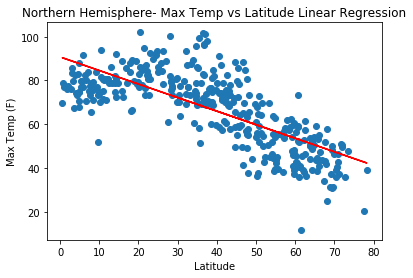

In [167]:
#calculate r-value for Northern Hemisphere
output = linear_regression(n_hemisphere["Latitude"], n_hemisphere["Max_temp"])
annotate(output, 0, 0)

#title, x and y labels
plt.title("Northern Hemisphere- Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("NHmaxtemp.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.49967870564867767


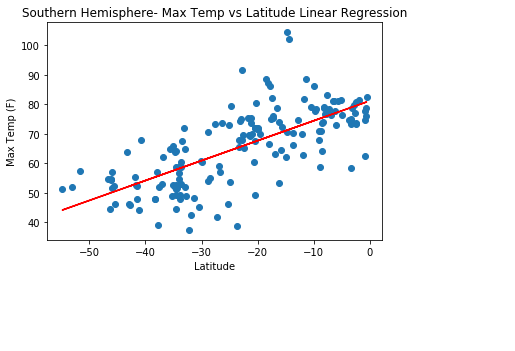

In [168]:
#calculate r-value for Southern Hemisphere
output = linear_regression(s_hemisphere["Latitude"], s_hemisphere["Max_temp"])
annotate(output, 0, 0)

#title, x and y labels
plt.title("Southern Hemisphere- Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("SHmaxtemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00022999149102965634


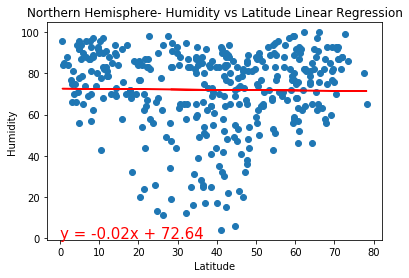

In [169]:
#calculate r-value for Northern Hemisphere
output = linear_regression(n_hemisphere["Latitude"], n_hemisphere["Humidity"])
annotate(output, 0, 0)

#title, x and y labels
plt.title("Northern Hemisphere- Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("NHhumid.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011816304944694682


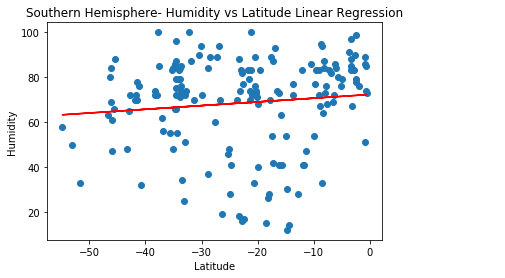

In [170]:
#calculate r-value for Southern Hemisphere
output = linear_regression(s_hemisphere["Latitude"], s_hemisphere["Humidity"])
annotate(output, 0, 0)

#title, x and y labels
plt.title("Southern Hemisphere- Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("SHhumid.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0006650016673178757


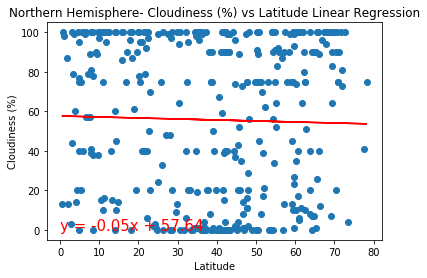

In [171]:
#calculate r-value for Northern Hemisphere
output = linear_regression(n_hemisphere["Latitude"], n_hemisphere["Cloudy"])
annotate(output, 0, 0)

#title, x and y labels
plt.title("Northern Hemisphere- Cloudiness (%) vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("NHCloudy.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.020267414095348116


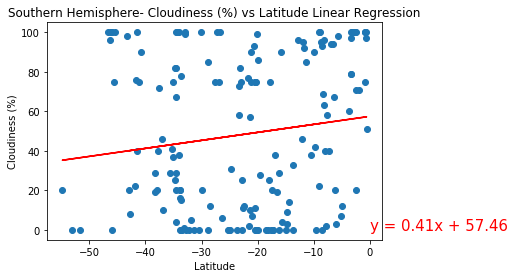

In [172]:
#calculate r-value for Northern Hemisphere
output = linear_regression(s_hemisphere["Latitude"], s_hemisphere["Cloudy"])
annotate(output, 0, 0)

#title, x and y labels
plt.title("Southern Hemisphere- Cloudiness (%) vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("SHCloudy.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0051279049855226305


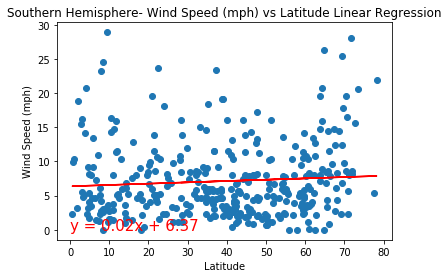

In [173]:
#calculate r-value for Northern Hemisphere
output = linear_regression(n_hemisphere["Latitude"], n_hemisphere["Wind"])
annotate(output, 0, 0)

#title, x and y labels
plt.title("Southern Hemisphere- Wind Speed (mph) vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("NHwind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.015526474339305311


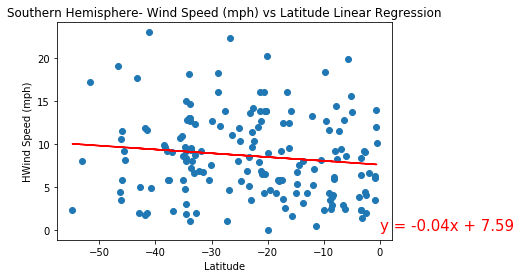

In [174]:
#calculate r-value for Northern Hemisphere
output = linear_regression(s_hemisphere["Latitude"], s_hemisphere["Wind"])
annotate(output, 0, 0)

#title, x and y labels
plt.title("Southern Hemisphere- Wind Speed (mph) vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("HWind Speed (mph)")
plt.savefig("SHwind.png")
plt.show()